# Exercise #7

In [3]:
#Print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

## Task 7.1

In [2]:
####Task 7.1 pt1: Merge and Clean the Dataset

### Importing required packages

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


### Getting the Datasets

os.chdir('/Users/[editted]/Desktop/SOCDATA/Exercise_7')
report_2019 = pd.read_csv('report_2019.csv')
report_2020 = pd.read_csv('report_2020.csv')

###Merging the datasets

merge_report_2019_2020 = pd.concat([report_2019, report_2020])

###Data Cleaning

##Dropping duplicates
merge_report_2019_2020 = merge_report_2019_2020.drop_duplicates()
##Dropping Missing Values
merge_report_2019_2020=merge_report_2019_2020.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'DISTRICT', 'Long', 'Lat', 'SHOOTING', 'OCCURRED_ON_DATE'])
##Checking Dataset
print(merge_report_2019_2020.shape)

###Saving the Dataset
merge_report_2019_2020.to_csv('merge_report_2019_2020.csv', index=False)



/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_86422/3576694044.py:15: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  report_2019 = pd.read_csv('report_2019.csv')
/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_86422/3576694044.py:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  report_2020 = pd.read_csv('report_2020.csv')


(156759, 17)


In [7]:
####Task 7.1 pt2: Identifying the trend


merge_report_2019_2020['offense_type'] = None
merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


offense_data_report = merge_report_2019_2020.groupby(['offense_type','YEAR',]).agg({'OFFENSE_DESCRIPTION': 'count'}).reset_index()
offense_data_report



/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_85968/3901470120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_85968/3901470120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


,offense_type,YEAR,OFFENSE_DESCRIPTION
0,property crime,2019,13158
1,property crime,2020,12227
2,violent crime,2019,8324
3,violent crime,2020,5152


#### Analysis for the result for 7.1
From the data, we can see that the crime related to violence decreased from year of 2019, which is 8,324 cases, to year of 2020, which is 5,152 cases. Similar pattern shows in property related crimes: from 13,0158 cases in 2019 to 12,227 cases in 2020. Also, the overall cases of property related is greater than violence related across two years.

## Task 7.2

/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_86422/3669945039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
/var/folders/c3/z4j0ypq143n7ncqb9_syqt980000gn/T/ipykernel_86422/3669945039.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'


<AxesSubplot:xlabel='INCIDENT_NUMBER_x', ylabel='INCIDENT_NUMBER_y'>

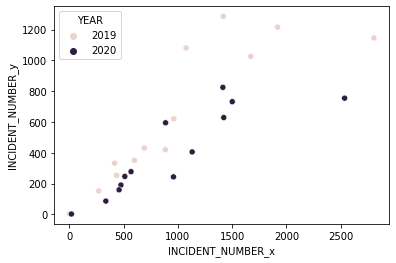

In [3]:
####Creating the Scatter plot

###Revising Data frame
merge_report_2019_2020['offense_type'] = None
merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
merge_report_2019_2020['offense_type'][merge_report_2019_2020['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|arson')] = 'property crime'
offense_data = merge_report_2019_2020.groupby(['offense_type', 'DISTRICT','YEAR','MONTH','INCIDENT_NUMBER']).agg({'OFFENSE_DESCRIPTION': 'count','SHOOTING': 'sum'}).reset_index()

###Combining data frame
new_offense_data = offense_data.groupby(['offense_type','DISTRICT','YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
property_data = new_offense_data.loc[lambda new_offense_data: new_offense_data['offense_type'] == "property crime"]
violent_data = new_offense_data.loc[lambda new_offense_data: new_offense_data['offense_type'] == "violent crime"]
new_crime_data = property_data.merge(violent_data, how = 'left', on=['DISTRICT','YEAR'])
#new_crime_data


###Creating Graph
sns.scatterplot(x='INCIDENT_NUMBER_x', y='INCIDENT_NUMBER_y', data = new_crime_data, hue='YEAR')




### Task 7.3

<AxesSubplot:xlabel='DISTRICT', ylabel='OFFENSE_DESCRIPTION'>

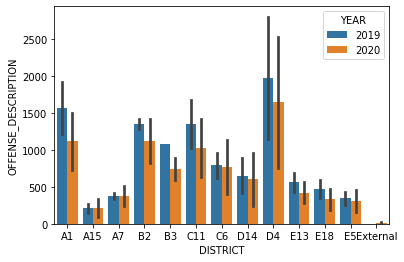

In [62]:
####Creating the bar chart

###Creating a new data set for bar chart
offense_data_bar = merge_report_2019_2020.groupby(['offense_type', 'DISTRICT','YEAR']).agg({'OFFENSE_DESCRIPTION': 'count','SHOOTING': 'sum'}).reset_index()
# offense_data_bar

###Creating Graph
sns.barplot(x='DISTRICT', y='OFFENSE_DESCRIPTION', data=offense_data_bar, hue='YEAR')


### Task 7.4

<AxesSubplot:xlabel='quarter', ylabel='SHOOTING'>

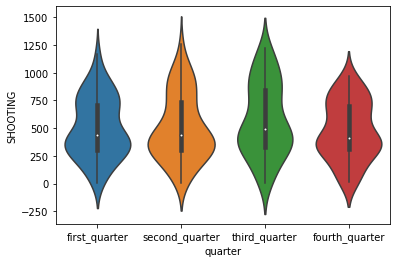

In [65]:
###Creating the violin chart

##Creating the "Quarter" variable
shooting_data = merge_report_2019_2020.groupby(['DISTRICT','YEAR','MONTH']).agg({'SHOOTING': 'count'}).reset_index()

shooting_data.loc[shooting_data['MONTH'].isin([10, 11, 12]), 'quarter'] = 'fourth_quarter'
shooting_data.loc[shooting_data['MONTH'].isin([7, 8, 9]), 'quarter'] = 'third_quarter'
shooting_data.loc[shooting_data['MONTH'].isin([4, 5, 6]), 'quarter'] = 'second_quarter'
shooting_data.loc[shooting_data['MONTH'].isin([1, 2, 3]), 'quarter'] = 'first_quarter'

##Creating Graph
sns.violinplot(y='SHOOTING', x='quarter', data=shooting_data)